In [2]:
import numpy as np
import pandas as pd

### What is Naive Bayes?
In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 

For example, a fruit may be considered to be a banana if it is yellow, slightly curve, and long enough. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

<img src="img/nb_1.png" width="180" height="360" align="center"/>

with:
- x : feature column
- y : target column

In this case, P(y|x) is probability from y that depends by x, so that P(x|y) is probability from x that depends by y.
Still confused? 

Example :
When you have data 
<img src="img/nb_2.png" width="540" height="360" align="center"/>

Let's get scratches !

First, import some data!

In [3]:
data = pd.read_csv('data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [6]:
models = GaussianNB()

In [7]:
models

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
data[500:].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
500,2,117,90,19,71,25.2,0.313,21,0
501,3,84,72,32,0,37.2,0.267,28,0
502,6,0,68,41,0,39.0,0.727,41,1
503,7,94,64,25,79,33.3,0.738,41,0
504,3,96,78,39,0,37.3,0.238,40,0


In [9]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [10]:
models.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [11]:
pred = models.predict(X)

In [12]:
models.predict_proba(X)

array([[0.32850606, 0.67149394],
       [0.98050589, 0.01949411],
       [0.19891096, 0.80108904],
       ...,
       [0.93094376, 0.06905624],
       [0.85706474, 0.14293526],
       [0.97738164, 0.02261836]])

In [13]:
models.score(X,y)

0.7630208333333334

In [14]:
print(metrics.classification_report(y, pred))
print(metrics.confusion_matrix(y, pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       500
           1       0.68      0.62      0.64       268

   micro avg       0.76      0.76      0.76       768
   macro avg       0.74      0.73      0.73       768
weighted avg       0.76      0.76      0.76       768

[[421  79]
 [103 165]]


---

In [15]:
# import package that are using for tree based model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [16]:
# create function
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [17]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
clf.predict(X)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [19]:
clf.score(X,y)

0.9544270833333334

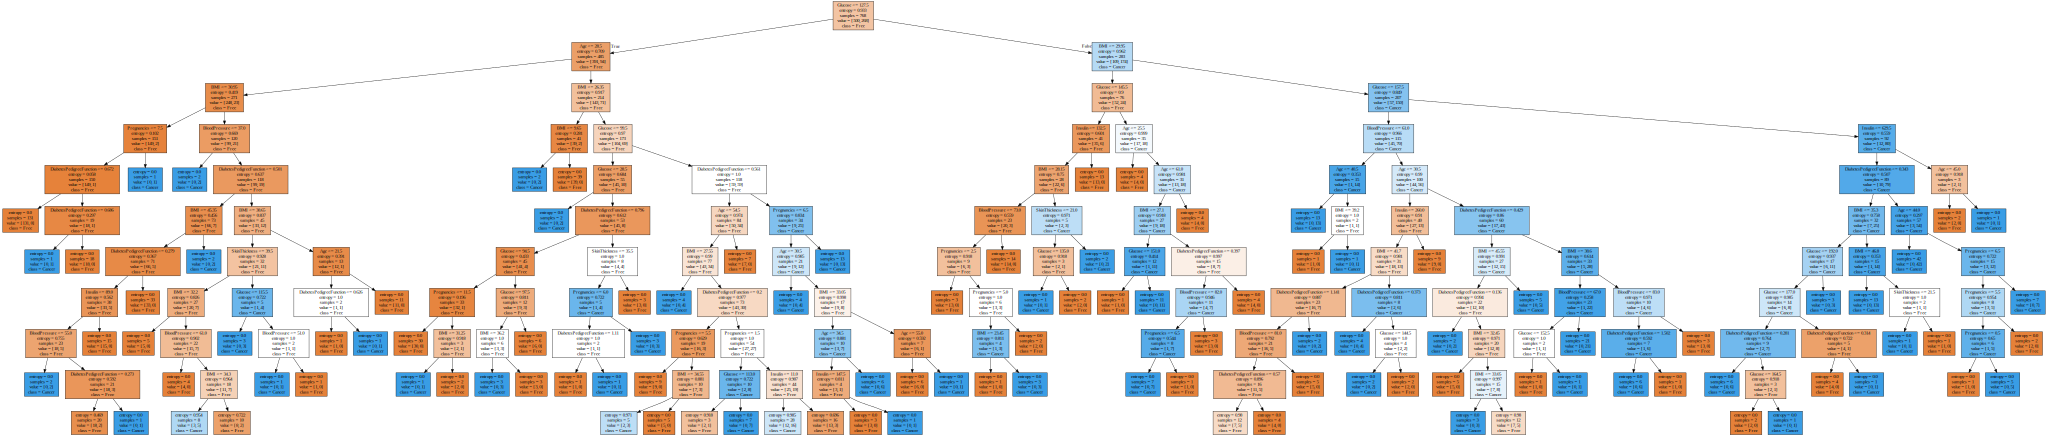

In [20]:
labels = X.columns

graph = Source(tree.export_graphviz(clf
      , out_file=None
      , feature_names=labels
      , class_names=['Free', 'Cancer']
      , filled = True))
   
display(SVG(graph.pipe(format='svg')))

---

<img src="img/nb_3.png" width="540" height="360" align="center"/>

How was Adaptive Boosting run?

In [21]:
from sklearn.ensemble import AdaBoostClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [22]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [25]:
model.feature_importances_

array([0.02, 0.16, 0.08, 0.  , 0.18, 0.22, 0.22, 0.12])

In [26]:
model.predict_proba(X_test)

array([[0.52555245, 0.47444755],
       [0.50640427, 0.49359573],
       [0.50453401, 0.49546599],
       [0.50415516, 0.49584484],
       [0.51469382, 0.48530618],
       [0.49465135, 0.50534865],
       [0.51236101, 0.48763899],
       [0.52905126, 0.47094874],
       [0.50917645, 0.49082355],
       [0.50868136, 0.49131864],
       [0.49920837, 0.50079163],
       [0.47512701, 0.52487299],
       [0.51343183, 0.48656817],
       [0.60819251, 0.39180749],
       [0.5111961 , 0.4888039 ],
       [0.51425722, 0.48574278],
       [0.49235128, 0.50764872],
       [0.49120757, 0.50879243],
       [0.50241578, 0.49758422],
       [0.63022916, 0.36977084],
       [0.49711029, 0.50288971],
       [0.60628409, 0.39371591],
       [0.49546382, 0.50453618],
       [0.50218902, 0.49781098],
       [0.49122967, 0.50877033],
       [0.49279434, 0.50720566],
       [0.4759036 , 0.5240964 ],
       [0.51861691, 0.48138309],
       [0.5096329 , 0.4903671 ],
       [0.50774441, 0.49225559],
       [0.

In [27]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7575757575757576)


In [28]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=0.01)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7619047619047619)


#### Decision Tree Classifier with Adaboosting

In [29]:

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
dtc=DecisionTreeClassifier(max_depth=5)

# Create adaboost classifer object
adaboost_dtc =AdaBoostClassifier(n_estimators=50, base_estimator=dtc,learning_rate=0.01)

# Train Adaboost Classifer
model = adaboost_dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7705627705627706)


#### Logistic Regression with adaboosting

In [30]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#hide warnings so you can't find any warning
import warnings 
warnings.simplefilter('ignore')

lr=LogisticRegression(C=1.0,max_iter=100)

# Create adaboost classifer object
adaboost_lr =AdaBoostClassifier(n_estimators=50, base_estimator=lr,learning_rate=1)

# Train Adaboost Classifer
model = adaboost_lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.70995670995671)


In [31]:
model.predict_proba(X_test)

array([[0.50399312, 0.49600688],
       [0.50081672, 0.49918328],
       [0.50493249, 0.49506751],
       [0.5037456 , 0.4962544 ],
       [0.50282272, 0.49717728],
       [0.50373524, 0.49626476],
       [0.50438381, 0.49561619],
       [0.50355516, 0.49644484],
       [0.50008076, 0.49991924],
       [0.50273268, 0.49726732],
       [0.50340991, 0.49659009],
       [0.49636885, 0.50363115],
       [0.50761272, 0.49238728],
       [0.50233934, 0.49766066],
       [0.5031037 , 0.4968963 ],
       [0.50243171, 0.49756829],
       [0.49645339, 0.50354661],
       [0.49824349, 0.50175651],
       [0.50615427, 0.49384573],
       [0.51018947, 0.48981053],
       [0.50081248, 0.49918752],
       [0.50244706, 0.49755294],
       [0.5040661 , 0.4959339 ],
       [0.50031689, 0.49968311],
       [0.50100294, 0.49899706],
       [0.50006888, 0.49993112],
       [0.50088032, 0.49911968],
       [0.50528106, 0.49471894],
       [0.50202564, 0.49797436],
       [0.50876495, 0.49123505],
       [0.

#### Random Forest with adaboosting

In [37]:
# Import Logistic Regression
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#hide warnings so you can't find any warning
import warnings 
warnings.simplefilter('ignore')

rfc=RandomForestClassifier(n_estimators=50,max_depth=3)

# Create adaboost classifer object
adaboost_rfc =AdaBoostClassifier(n_estimators=50, base_estimator=rfc,learning_rate=0.001)

# Train Adaboost Classifer
model = adaboost_lr.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.70995670995671)


In [39]:
model_rf = rfc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model_rf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.7705627705627706)
